# Wines Points prediction 

In [1]:
#bag of words
#Data exploration end of video

In [2]:
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../')

In [3]:
#pip install countryinfo

In [4]:
#pip install forex_python

Here we will try to predict the points a wine will get based on known characteristics (i.e. features, in the ML terminology). The mine point in this stage is to establish a simple, ideally super cost effective, basline.
In the real world there is a tradeoff between complexity and perforamnce, and the DS job, among others, is to present a tradeoff tables of what performance is achivalbel at what complexity level. 

to which models with increased complexity and resource demands will be compared. Complexity should then be translated into cost. For example:
 * Compute cost 
 * Maintenance cost
 * Serving costs (i.e. is new platform needed?) 
 

## Loading the data

In [5]:
import pandas as pd
import cufflinks as cf; cf.go_offline()

In [6]:
wine_reviews = pd.read_csv("C:/Users/or.nagari/Python_ML_2023/data/winemag-data-130k-v2.csv")
wine_reviews.shape

(129971, 14)

In [7]:
#Data Exploration

In [8]:
wine_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [9]:
wine_reviews.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [10]:
#check repetition in title and description 
#Has to drop the first coumn!
wine_reviews.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
duplicates = wine_reviews[wine_reviews.duplicated()]
duplicates
#There are duplicate value
#lets remove them for further checks


country                                        description  \
2408        US  This is weighty, creamy and medium to full in ...   
2409     Italy  There's a touch of toasted almond at the start...   
2410     Chile  Lightly herbal strawberry and raspberry aromas...   
2412     Italy  The Monica grape often shows a rustic or raw q...   
2413    France  Fruity and lightly herbaceous, this has fine t...   
...        ...                                                ...   
129879      US  This wine is a blend of 45% Grenache, 37% Syra...   
129880      US  Apple blossom intrigues on the nose of this li...   
129881   Spain  This Verdejo smells like citrus fruits and wil...   
129882      US  This wine is mostly Cabernet Sauvignon (78%), ...   
129913      US  This is taut and dense, and requires time and ...   

               designation  points  price           province  \
2408                   NaN      85   14.0         California   
2409    Sallier de la Tour      85   13.0  Sicily & Sardinia   
2410               Reserve      85   13.0       Maipo Valley   
2412                 Dolia      85   14.0  Sicily & Sardinia   
2413     La Fleur d'Amélie      85   15.0           Bordeaux   
...                    ...     ...    ...                ...   
129879               Metis      90   20.0         Washington   
129880                 NaN      90   20.0         California   
129881                 NaN      90   19.0     Northern Spain   
129882             Reserve      90   60.0         Washington   
129913   Artist Series #14      92   44.0         Washington   

                    region_1         region_2        taster_name  \
2408             North Coast      North Coast     Virginie Boone   
2409                 Sicilia              NaN                NaN   
2410                     NaN              NaN  Michael Schachner   
2412      Monica di Sardegna              NaN                NaN   
2413          Bordeaux Blanc              NaN         Roger Voss   
...                      ...              ...                ...   
129879  Columbia Valley (WA)  Columbia Valley   Sean P. Sullivan   
129880  Russian River Valley           Sonoma     Virginie Boone   
129881                 Rueda              NaN  Michael Schachner   
129882  Columbia Valley (WA)  Columbia Valley   Sean P. Sullivan   
129913  Columbia Valley (WA)  Columbia Valley       Paul Gregutt   

       taster_twitter_handle  \
2408                 @vboone   
2409                     NaN   
2410             @wineschach   
2412                     NaN   
2413              @vossroger   
...                      ...   
129879         @wawinereport   
129880               @vboone   
129881           @wineschach   
129882         @wawinereport   
129913           @paulgwine    

                                                    title  \
2408              Souverain 2010 Chardonnay (North Coast)   
2409    Tasca d'Almerita 2011 Sallier de la Tour Grill...   
2410    Tres Palacios 2011 Reserve Pinot Noir (Maipo V...   
2412    Cantine di Dolianova 2010 Dolia  (Monica di Sa...   
2413    Château de Sours 2011 La Fleur d'Amélie  (Bord...   
...                                                   ...   
129879  Maison Bleue 2013 Metis Red (Columbia Valley (...   
129880  Martin Ray 2015 Chardonnay (Russian River Valley)   
129881                  Martinsancho 2015 Verdejo (Rueda)   
129882   Matthews 2012 Reserve Red (Columbia Valley (WA))   
129913  Woodward Canyon 2005 Artist Series #14 Caberne...   

                           variety                winery  
2408                    Chardonnay             Souverain  
2409                        Grillo      Tasca d'Almerita  
2410                    Pinot Noir         Tres Palacios  
2412                        Monica  Cantine di Dolianova  
2413    Bordeaux-style White Blend      Château de Sours  
...                            ...                   ...  
129879                   Red Blend          Maison Bleue  
12

In [12]:
repetitive_records = wine_reviews[wine_reviews.duplicated(keep=False)]

# Sort the repetitive records in descending order
df = repetitive_records.sort_values(ascending=False,by ='description')

# Print the head of the sorted DataFrame
df['description']

91976     “Open and drink” the instructions should read,...
19401     “Open and drink” the instructions should read,...
129801    “Il Bugiardo,” which is Italian for “the liar,...
87891     “Il Bugiardo,” which is Italian for “the liar,...
13889     “Fresh and dry” is what the wine label adverti...
                                ...                        
100745    87-89 Barrel sample. A pleasurable, perfumed w...
72181     100% Sangiovese, this pale pink wine has notes...
119702    100% Sangiovese, this pale pink wine has notes...
46540     100% Malbec, it's redolent with dark plums, wi...
67614     100% Malbec, it's redolent with dark plums, wi...
Name: description, Length: 19966, dtype: object

In [14]:
#check nulls
null_counts = wine_reviews.isnull().sum()
null_counts.sort_values(ascending=False)

region_2                 79460
designation              37465
taster_twitter_handle    31213
taster_name              26244
region_1                 21247
price                     8996
country                     63
province                    63
variety                      1
description                  0
points                       0
title                        0
winery                       0
dtype: int64

In [101]:
#check speבific repetition
repetitive_titles_count = wine_reviews['title'].value_counts()

# Print the repetitive titles with their counts
print(repetitive_titles_count[repetitive_titles_count > 1])
#means that its not unique

51608    9
97204    7
97209    7
6652     6
51604    6
        ..
64130    2
9525     2
71509    2
23753    2
77398    2
Name: title, Length: 934, dtype: int64


In [102]:
repetitive_description_count = wine_reviews['description'].value_counts()

# Print the repetitive titles with their counts
df = repetitive_description_count[repetitive_description_count > 1]
df
#means that its not unique -Suspicies!!!!!

18819     2
32756     2
49230     2
81157     2
45011     2
582       2
81080     2
111084    2
65863     2
18266     2
68214     2
101571    2
16938     2
25996     2
25644     2
74056     2
67849     2
41323     2
45483     2
28572     2
114374    2
110275    2
67960     2
114038    2
107184    2
2711      2
66520     2
41451     2
32899     2
69205     2
102467    2
18657     2
348       2
18793     2
36411     2
72683     2
74045     2
13756     2
29625     2
Name: description, dtype: int64

In [17]:
#check the combination county review title - suppose to be after remove duplicate
import pandas as pd

# Assuming you have the DataFrame called 'wine_reviews'
duplicate_records = wine_reviews[wine_reviews.duplicated(subset=['country', 'description', 'title'], keep=False)]

# Print the duplicate records
duplicate_records


country                                        description  \
9       France  This has great depth of flavor with its fresh ...   
10          US  Soft, supple plum envelopes an oaky structure ...   
11      France  This is a dry wine, very spicy, with a tight, ...   
12          US  Slightly reduced, this wine offers a chalky, t...   
13       Italy  This is dominated by oak and oak-driven aromas...   
...        ...                                                ...   
129879      US  This wine is a blend of 45% Grenache, 37% Syra...   
129880      US  Apple blossom intrigues on the nose of this li...   
129881   Spain  This Verdejo smells like citrus fruits and wil...   
129882      US  This wine is mostly Cabernet Sauvignon (78%), ...   
129913      US  This is taut and dense, and requires time and ...   

              designation  points  price           province  \
9             Les Natures      87   27.0             Alsace   
10         Mountain Cuvée      87   19.0         California   
11                    NaN      87   30.0             Alsace   
12                    NaN      87   34.0         California   
13                  Rosso      87    NaN  Sicily & Sardinia   
...                   ...     ...    ...                ...   
129879              Metis      90   20.0         Washington   
129880                NaN      90   20.0         California   
129881                NaN      90   19.0     Northern Spain   
129882            Reserve      90   60.0         Washington   
129913  Artist Series #14      92   44.0         Washington   

                    region_1         region_2        taster_name  \
9                     Alsace              NaN         Roger Voss   
10               Napa Valley             Napa     Virginie Boone   
11                    Alsace              NaN         Roger Voss   
12          Alexander Valley           Sonoma     Virginie Boone   
13                      Etna              NaN      Kerin O’Keefe   
...                      ...              ...                ...   
129879  Columbia Valley (WA)  Columbia Valley   Sean P. Sullivan   
129880  Russian River Valley           Sonoma     Virginie Boone   
129881                 Rueda              NaN  Michael Schachner   
129882  Columbia Valley (WA)  Columbia Valley   Sean P. Sullivan   
129913  Columbia Valley (WA)  Columbia Valley       Paul Gregutt   

       taster_twitter_handle  \
9                 @vossroger   
10                   @vboone   
11                @vossroger   
12                   @vboone   
13              @kerinokeefe   
...                      ...   
129879         @wawinereport   
129880               @vboone   
129881           @wineschach   
129882         @wawinereport   
129913           @paulgwine    

                                                    title  \
9       Jean-Baptiste Adam 2012 Les Natures Pinot Gris...   
10      Kirkland Signature 2011 Mountain Cuvée Caberne...   
11                Leon Beyer 2012 Gewurztraminer (Alsace)   
12      Louis M. Martini 2012 Cabernet Sauvignon (Alex...   
13                 Masseria Setteporte 2012 Rosso  (Etna)   
...                                                   ...   
129879  Maison Bleue 2013 Metis Red (Columbia Valley (...   
129880  Martin Ray 2015 Chardonnay (Russian River Valley)   
129881                  Martinsancho 2015 Verdejo (Rueda)   
129882   Matthews 2012 Reserve Red (Columbia Valley (WA))   
129913  Woodward Canyon 2005 Artist Series #14 Caberne...   

                         variety               winery  
9                     Pinot Gris   Jean-Baptiste Adam  
10            Cabernet Sauvignon   Kirkland Signature  
11                Gewürztraminer           Leon Beyer  
12            Cabernet Sauvignon     Louis M. Martini  
13             Nerello Mascalese  Masseria Setteporte  
...                          ...                  ...  
129879                 Red Blend         Maison Bleue  
129880                Chardonnay      

In [18]:
#its a problem - want to check after cleaning

In [19]:
#wine_reviews.head()

In [20]:
#wine_reviews = wine_reviews[wine_reviews['country'].notnull()]
wine_reviews.shape

(129971, 13)

In [21]:
#keys: winery, description,variety

In [22]:
import pandas as pd
#check countries spelling
unique_countries = wine_reviews['country'].unique()

# Print the unique countries
unique_countries
# There are nulls values

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [103]:
#Check duplicate values

duplicates = wine_reviews[wine_reviews.duplicated()]

#duplicates

In [24]:
#check avarage points
average_points = wine_reviews['points'].mean()
average_points

88.44713820775404

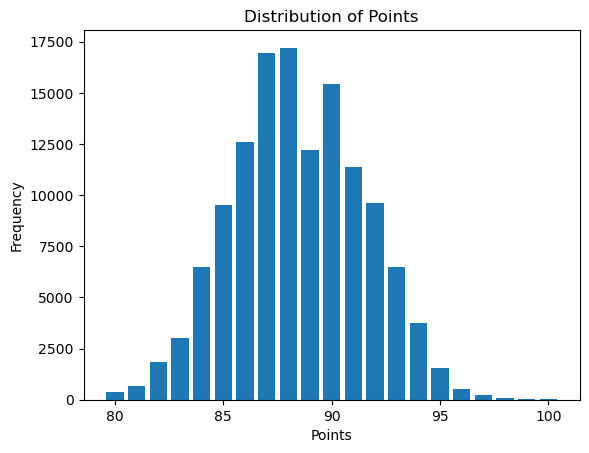

In [25]:
#check Normal
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the "wine_reviews" DataFrame
data = wine_reviews['points']

# Count the frequency of each unique value in the "points" column
value_counts = data.value_counts().sort_index()

# Create a bar plot
plt.bar(value_counts.index, value_counts.values)

# Set the plot title and axes labels
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Frequency')

# Display the plot
plt.show()


In [26]:
#check outliers
#min
wine_reviews['points'].min()

80

In [27]:
#max
wine_reviews['points'].max()

100

In [28]:
wine_reviews.points.describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [29]:
wine_reviews.country.value_counts().div(wine_reviews.shape[0]).head()

US          0.419355
France      0.169984
Italy       0.150341
Spain       0.051127
Portugal    0.043787
Name: country, dtype: float64

In [30]:
pd.concat([wine_reviews.country.value_counts().rename('counts'), 
          wine_reviews.country.value_counts().rename('proportion').div(wine_reviews.shape[0])], axis=1).head()

counts  proportion
US         54504    0.419355
France     22093    0.169984
Italy      19540    0.150341
Spain       6645    0.051127
Portugal    5691    0.043787

In [31]:
#check price per country for units maybe

In [32]:
average_points = wine_reviews.groupby('country')['points'].mean()
average_points

country
Argentina                 86.710263
Armenia                   87.500000
Australia                 88.580507
Austria                   90.101345
Bosnia and Herzegovina    86.500000
Brazil                    84.673077
Bulgaria                  87.936170
Canada                    89.369650
Chile                     86.493515
China                     89.000000
Croatia                   87.219178
Cyprus                    87.181818
Czech Republic            87.250000
Egypt                     84.000000
England                   91.581081
France                    88.845109
Georgia                   87.686047
Germany                   89.851732
Greece                    87.283262
Hungary                   89.191781
India                     90.222222
Israel                    88.471287
Italy                     88.562231
Lebanon                   87.685714
Luxembourg                88.666667
Macedonia                 86.833333
Mexico                    85.257143
Moldova             

In [33]:

import plotly_express as px

In [34]:
wine_reviews[['price','points']].corr(method = 'pearson')

price    points
price   1.000000  0.416167
points  0.416167  1.000000

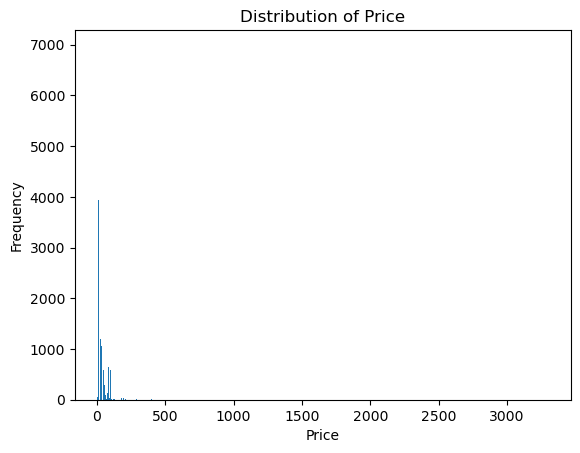

In [35]:
#check Normal
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the "wine_reviews" DataFrame
data = wine_reviews['price']

# Count the frequency of each unique value in the "points" column
value_counts = data.value_counts().sort_index()

# Create a bar plot
plt.bar(value_counts.index, value_counts.values)

# Set the plot title and axes labels
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Display the plot
plt.show()


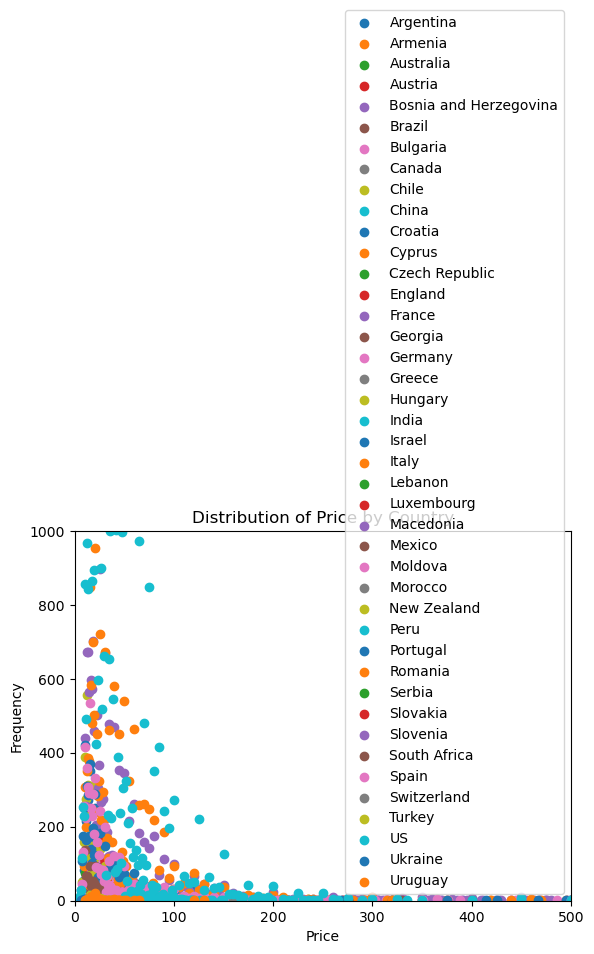

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the "wine_reviews" DataFrame
data = wine_reviews[['country', 'price']]  # Selecting the 'country' and 'price' columns

# Group the data by country and count the frequency of each unique price within each country
grouped_data = data.groupby('country')['price'].value_counts().sort_index()

# Reset the index
grouped_data = grouped_data.reset_index(name='frequency')

# Create a scatter plot for each country
for country, values in grouped_data.groupby('country'):
    plt.scatter(values['price'], values['frequency'], label=country)

# Set the plot title and axes labels
plt.title('Distribution of Price by Country')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Set the range for the x-axis and y-axis
plt.xlim(0, 500)
plt.ylim(0, 1000)

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


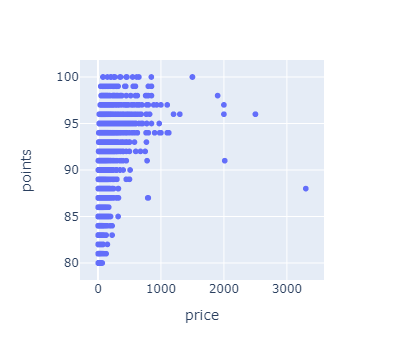

In [37]:
px.scatter(wine_reviews, x='price',y='points')

In [38]:
top_ten_countries = wine_reviews.country.value_counts().index[:10]
list(top_ten_countries)

['US',
 'France',
 'Italy',
 'Spain',
 'Portugal',
 'Chile',
 'Argentina',
 'Austria',
 'Australia',
 'Germany']

In [39]:

wine_reviews.groupby('country')[['price','points']].corr(method = 'pearson').loc[top_ten_countries]

price    points
country                             
US        price   1.000000  0.453079
          points  0.453079  1.000000
France    price   1.000000  0.405829
          points  0.405829  1.000000
Italy     price   1.000000  0.528073
          points  0.528073  1.000000
Spain     price   1.000000  0.471112
          points  0.471112  1.000000
Portugal  price   1.000000  0.440235
          points  0.440235  1.000000
Chile     price   1.000000  0.480307
          points  0.480307  1.000000
Argentina price   1.000000  0.568168
          points  0.568168  1.000000
Austria   price   1.000000  0.392841
          points  0.392841  1.000000
Australia price   1.000000  0.466198
          points  0.466198  1.000000
Germany   price   1.000000  0.453121
          points  0.453121  1.000000

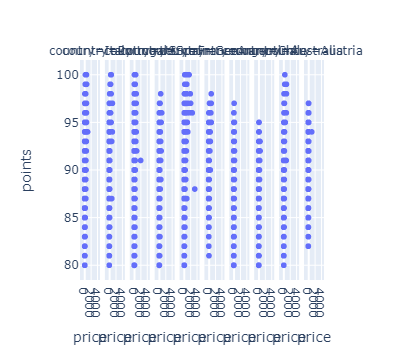

In [40]:

px.scatter(wine_reviews[wine_reviews.country.isin(top_ten_countries)], x='price',y='points',facet_col='country')

In [41]:
#Data cleaning
wine_reviews.shape

(129971, 13)

In [42]:
#wine_reviews.drop('Unnamed: 0', axis=1, inplace=True)
wine_reviews.shape

(129971, 13)

In [43]:
wine_reviews = wine_reviews.drop_duplicates()
wine_reviews.shape

(119988, 13)

In [44]:
#remove null values from countries
wine_reviews= wine_reviews.dropna(subset=['country'])

In [45]:
#remove null values from countries
wine_reviews= wine_reviews.dropna(subset=['variety'])

In [46]:
#remove columns region_2  and taster_twitter_handle
wine_reviews = wine_reviews.drop(["region_2", "taster_twitter_handle"], axis=1)

In [47]:
# Update null values in the "taster_name" column to 'No Name'
wine_reviews['taster_name'].fillna('No Name', inplace=True)

In [48]:
# Update null values in the "region_1" column to 'Undifined'
wine_reviews['region_1'].fillna('Undifined', inplace=True)

In [49]:
# Calculate the average price for each country
average_prices = wine_reviews.groupby('country')['price'].transform('mean')

# Fill null values in the "price" column with the average prices
wine_reviews['price'].fillna(average_prices, inplace=True)


In [50]:
#remove Egypt because only one record
wine_reviews = wine_reviews[wine_reviews['country'] != 'Egypt']

In [51]:
#check nulls
null_counts = wine_reviews.isnull().sum()
null_counts.sort_values(ascending=False)

designation    34534
country            0
description        0
points             0
price              0
province           0
region_1           0
taster_name        0
title              0
variety            0
winery             0
dtype: int64

In [52]:
wine_reviews.shape

(119927, 11)

In [53]:
wine_reviews.nunique()

country            42
description    119894
designation     37953
points             21
price             411
province          424
region_1         1230
taster_name        20
title          118779
variety           701
winery          16744
dtype: int64

In [54]:
average_prices = wine_reviews.groupby('country')['price'].transform('mean')
average_prices

0         39.928286
1         26.554198
2         36.697520
3         36.697520
4         36.697520
            ...    
129966    43.460789
129967    36.697520
129968    41.994105
129969    41.994105
129970    41.994105
Name: price, Length: 119927, dtype: float64

In [55]:
print(wine_reviews['country'].value_counts())

US                        50457
France                    20353
Italy                     17940
Spain                      6116
Portugal                   5256
Chile                      4183
Argentina                  3544
Austria                    3034
Australia                  2197
Germany                    1992
South Africa               1301
New Zealand                1278
Israel                      466
Greece                      432
Canada                      226
Bulgaria                    132
Hungary                     129
Romania                     102
Uruguay                      98
Turkey                       81
Slovenia                     77
Georgia                      76
Croatia                      70
Mexico                       68
England                      63
Moldova                      56
Brazil                       49
Lebanon                      32
Morocco                      24
Peru                         16
Ukraine                      14
Czech Re

In [56]:
#remove country less then 30 Observations ~ Normal
country_counts = wine_reviews['country'].value_counts()
wine_reviews = wine_reviews.groupby('country').filter(lambda x: len(x) >= 30)


In [57]:
import cufflinks as cf; cf.go_offline()

In [58]:
import re

# If you want to keep only the first number found in each title, you can modify the lambda function as follows:
wine_reviews['year'] = wine_reviews['title'].apply(lambda x: re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else None)
wine_reviews['year'].fillna(0, inplace=True)

In [59]:
# Drop the "designation" column - internal info
wine_reviews.drop('designation', axis=1, inplace=True)

In [60]:
wine_reviews.head()

country                                        description  points  \
0     Italy  Aromas include tropical fruit, broom, brimston...      87   
1  Portugal  This is ripe and fruity, a wine that is smooth...      87   
2        US  Tart and snappy, the flavors of lime flesh and...      87   
3        US  Pineapple rind, lemon pith and orange blossom ...      87   
4        US  Much like the regular bottling from 2012, this...      87   

       price           province             region_1         taster_name  \
0  39.928286  Sicily & Sardinia                 Etna       Kerin O’Keefe   
1  15.000000              Douro            Undifined          Roger Voss   
2  14.000000             Oregon    Willamette Valley        Paul Gregutt   
3  13.000000           Michigan  Lake Michigan Shore  Alexander Peartree   
4  65.000000             Oregon    Willamette Valley        Paul Gregutt   

                                               title         variety  \
0                  Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1      Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2      Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3  St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4  Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   

                winery  year  
0              Nicosia  2013  
1  Quinta dos Avidagos  2011  
2            Rainstorm  2013  
3           St. Julian  2013  
4         Sweet Cheeks  2012

In [61]:
#train and test
train_data = wine_reviews.sample(frac = 0.8)
test_data = wine_reviews[~wine_reviews.index.isin(train_data.index)]
assert(len(train_data) + len(test_data) == len(wine_reviews))


#Baselines

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [63]:

def calc_prediction_quality(df, pred_score_col, true_score_col):
    return pd.Series({'MSE': mean_squared_error(df[true_score_col], df[pred_score_col]),
                      'MAE': mean_absolute_error(df[true_score_col], df[pred_score_col]),
                      'R2': r2_score(df[true_score_col], df[pred_score_col])})

In [64]:
test_data['basiline_1_predicted_points'] = train_data.points.mean()
b1_stats = calc_prediction_quality(test_data, 'basiline_1_predicted_points', 'points')
b1_stats

MSE    9.440694
MAE    2.519750
R2    -0.000293
dtype: float64

In [65]:
avg_points_by_country = train_data.groupby('country').points.mean()
avg_points_by_country.head()

country
Argentina    86.636079
Australia    88.594473
Austria      90.097500
Brazil       84.375000
Bulgaria     87.886792
Name: points, dtype: float64

In [66]:
test_data['basiline_2_predicted_points'] = test_data.country.map(avg_points_by_country).fillna(train_data.points.mean())
b2_stats = calc_prediction_quality(test_data, 'basiline_2_predicted_points', 'points')
b2_stats

MSE    8.998556
MAE    2.455461
R2     0.046554
dtype: float64

In [67]:
avg_points_by_country_and_region = train_data.groupby(['country','province']).points.mean().rename('basiline_3_predicted_points')
avg_points_by_country_and_region.head()

country    province        
Argentina  Mendoza Province    86.756255
           Other               85.889724
Australia  Australia Other     85.505319
           New South Wales     87.461538
           South Australia     89.059863
Name: basiline_3_predicted_points, dtype: float64

In [68]:
test_data_with_baseline_3 = test_data.merge(avg_points_by_country_and_region, on = ['country','province'], how='left')
test_data_with_baseline_3.basiline_3_predicted_points = test_data_with_baseline_3.basiline_3_predicted_points.fillna(test_data_with_baseline_3.basiline_2_predicted_points).fillna(test_data.basiline_1_predicted_points)
test_data_with_baseline_3.shape, test_data.shape

((23962, 14), (23962, 13))

In [69]:
b3_stats = calc_prediction_quality(test_data_with_baseline_3, 'basiline_3_predicted_points', 'points')
b3_stats

MSE    8.447128
MAE    2.364926
R2     0.104981
dtype: float64

In [93]:
baseline_summary = pd.DataFrame([b1_stats, b2_stats, b3_stats], index=['baseline_1', 'baseline_2','baseline_3'])
baseline_summary

MSE       MAE        R2
baseline_1  9.440694  2.519750 -0.000293
baseline_2  8.998556  2.455461  0.046554
baseline_3  8.447128  2.364926  0.104981

In [71]:
wine_reviews.head(1)

country                                        description  points  \
0   Italy  Aromas include tropical fruit, broom, brimston...      87   

       price           province region_1    taster_name  \
0  39.928286  Sicily & Sardinia     Etna  Kerin O’Keefe   

                               title      variety   winery  year  
0  Nicosia 2013 Vulkà Bianco  (Etna)  White Blend  Nicosia  2013

In [72]:
#check nulls
null_counts = wine_reviews.isnull().sum()
null_counts.sort_values(ascending=False)

country        0
description    0
points         0
price          0
province       0
region_1       0
taster_name    0
title          0
variety        0
winery         0
year           0
dtype: int64

In [74]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Encoding
enc = OneHotEncoder(sparse=False)
le = LabelEncoder()

# Fit and transform the 'country' column
wine_reviews['country'] = le.fit_transform(wine_reviews['country'])
country_enc_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Fit and transform the 'description' column
wine_reviews['description'] = le.fit_transform(wine_reviews['description'])
description_enc_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Fit and transform the 'province' column
wine_reviews['province'] = le.fit_transform(wine_reviews['province'])
province_enc_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Fit and transform the 'region_1' column
wine_reviews['region_1'] = le.fit_transform(wine_reviews['region_1'])
region_1_enc_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Fit and transform the 'taster_name' column
wine_reviews['taster_name'] = le.fit_transform(wine_reviews['taster_name'])
taster_name_enc_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Fit and transform the 'title' column
wine_reviews['title'] = le.fit_transform(wine_reviews['title'])
title_enc_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Fit and transform the 'variety' column
wine_reviews['variety'] = le.fit_transform(wine_reviews['variety'])
variety_enc_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Fit and transform the 'winery' column
wine_reviews['winery'] = le.fit_transform(wine_reviews['winery'])
winery_enc_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the DataFrame information
print(wine_reviews.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 119808 entries, 0 to 129970
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      119808 non-null  int32  
 1   description  119808 non-null  int32  
 2   points       119808 non-null  int64  
 3   price        119808 non-null  float64
 4   province     119808 non-null  int32  
 5   region_1     119808 non-null  int32  
 6   taster_name  119808 non-null  int32  
 7   title        119808 non-null  int32  
 8   variety      119808 non-null  int32  
 9   winery       119808 non-null  int32  
 10  year         119808 non-null  object 
dtypes: float64(1), int32(8), int64(1), object(1)
memory usage: 7.3+ MB
None


In [79]:
from sklearn.model_selection import train_test_split
X = wine_reviews.drop('points', axis=1)
y = wine_reviews['points']
print(y.min())
print(y.max())

80
100


In [80]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Absolute Error (MAE): 2.246393422833646
Mean Squared Error (MSE): 7.783001116022563
Root Mean Squared Error (RMSE): 2.789803060436805


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and fit the linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linreg.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)


Mean Absolute Error (MAE): 2.246393422833646
Mean Squared Error (MSE): 7.783001116022563
Coefficient of Determination (R^2): 0.18785439024787365


In [94]:
new_record = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Add the new record with a specific index using the loc indexer
baseline_summary.loc['linear_regression'] = new_record
baseline_summary

MSE       MAE        R2
baseline_1         9.440694  2.519750 -0.000293
baseline_2         8.998556  2.455461  0.046554
baseline_3         8.447128  2.364926  0.104981
linear_regression  7.783001  2.246393  0.187854

In [92]:
baseline_summary

MSE       MAE        R2
0      9.440694  2.519750 -0.000293
1      8.998556  2.455461  0.046554
2      8.447128  2.364926  0.104981
3      7.783001  2.246393  0.187854
10010  7.783001  2.246393  0.187854

In [96]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

# Create and fit the KNN regression model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)


Mean Absolute Error (MAE): 2.561180201986479
Mean Squared Error (MSE): 10.211489858943327
Coefficient of Determination (R^2): -0.06555511612304143


In [97]:
new_record = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Add the new record with a specific index using the loc indexer
baseline_summary.loc['KNN'] = new_record
baseline_summary

MSE       MAE        R2
baseline_1          9.440694  2.519750 -0.000293
baseline_2          8.998556  2.455461  0.046554
baseline_3          8.447128  2.364926  0.104981
linear_regression   7.783001  2.246393  0.187854
KNN                10.211490  2.561180 -0.065555

In [99]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Create and fit the Random Forest regression model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)


Mean Absolute Error (MAE): 1.6945497036975212
Mean Squared Error (MSE): 4.686322059928219
Coefficient of Determination (R^2): 0.5109886494786658


In [100]:
new_record = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Add the new record with a specific index using the loc indexer
baseline_summary.loc['RandomForest'] = new_record
baseline_summary

MSE       MAE        R2
baseline_1          9.440694  2.519750 -0.000293
baseline_2          8.998556  2.455461  0.046554
baseline_3          8.447128  2.364926  0.104981
linear_regression   7.783001  2.246393  0.187854
KNN                10.211490  2.561180 -0.065555
RandomForest        4.686322  1.694550  0.510989